# xView Processing
This was adapted directly from https://github.com/DIUx-xView/data_utilities/blob/master/xView%20Processing.ipynb.

In [1]:
import aug_util as aug
import wv_util as wv
import matplotlib.pyplot as plt
import numpy as np
import csv
%matplotlib inline

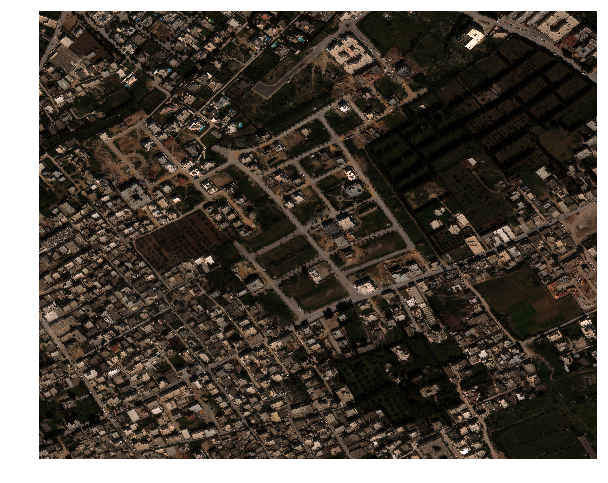

In [2]:
#Load an image
chip_name = '104.tif'
chip_path = '../../data/'
arr = wv.get_image(chip_path + chip_name)

plt.figure(figsize=(10,10))
plt.axis('off')
plt.imshow(arr)

In [3]:
# Label Path
#label_path = '../../data/xView_train.geojson'
#label_path = '../../data/output_json_test.geojson'
label_path = '../../data/justcars_test1.geojson'

#Loading our labels
coords, chips, classes = wv.get_labels(label_path)
#We only want to coordinates and classes that are within our chip
coords = coords[chips==chip_name]
classes = classes[chips==chip_name].astype(np.int64)

100%|██████████| 211664/211664 [00:01<00:00, 155778.60it/s]


In [4]:
#Load the class number -> class string label map
labels = {}
with open('xview_class_labels.txt') as f:
    for row in csv.reader(f):
        labels[int(row[0].split(":")[0])] = row[0].split(":")[1]

In [5]:
#We can find which classes are present in this image
print([labels[i] for i in np.unique(classes)])

['Small Car']


In [12]:
#We can chip the image into chips 
#(I've chosen 250x250 so you can see cars easier, original was 500x500)
c_img, c_box, c_cls = wv.chip_image(img = arr, coords= coords, 
                                    classes=classes, shape=(250,250))
print("Num Chips: %d" % c_img.shape[0])

Num Chips: 130


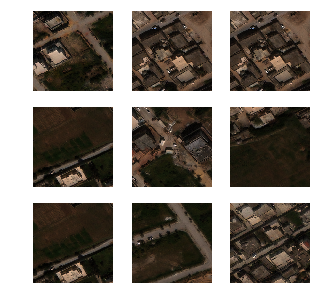

In [13]:
#We can plot some of the chips
fig,ax = plt.subplots(3)
fig.set_figheight(5)
fig.set_figwidth(5)

for k in range(9):
    plt.subplot(3,3,k+1)
    plt.axis('off')
    plt.imshow(c_img[np.random.choice(range(c_img.shape[0]))])

plt.show()

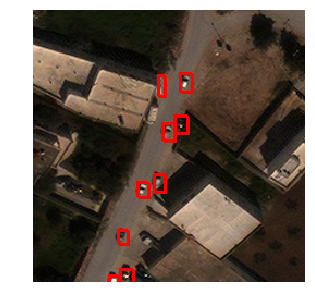

In [14]:
#We can visualize the chips with their labels
ind = np.random.choice(range(c_img.shape[0]))
ind = 0
labelled = aug.draw_bboxes(c_img[ind],c_box[ind])
plt.figure(figsize=(5,5))
plt.axis('off')
plt.imshow(labelled)

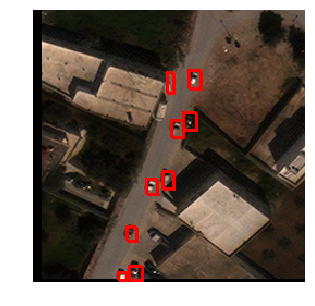

In [15]:
#We can shift the chips
i1,b1 = aug.shift_image(c_img[ind],c_box[ind])
a1 = aug.draw_bboxes(i1,b1)
plt.figure(figsize=(5,5))
plt.axis('off')
plt.imshow(a1)

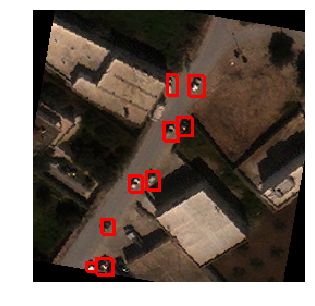

In [16]:
#We can rotate the chips
center = (int(c_img[ind].shape[0]/2),int(c_img[ind].shape[1]/2))
i2,b2 = aug.rotate_image_and_boxes(c_img[ind],10, center, c_box[ind])
a2 = aug.draw_bboxes(i2,b2)
plt.figure(figsize=(5,5))
plt.axis('off')
plt.imshow(a2)

In [11]:
#There are other augmentations available in 'aug_util.py'
#From here, you can save out the chipped images to a TFRecord or other medium
#Use 'process_wv.py' to create a TFRecord file from xView imagery